In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cftime

# Looking at ETo result data

In [12]:
# some definitions
pr_datapath = "/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/pr/day/latest/pr_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc"
eto_fao_datapath32 = "/home/users/nelerey/data/PE/ETo-fao56/evpot-fao56_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc"

In [13]:
ds_pr = xr.open_dataset(pr_datapath)
ds_eto32 = xr.open_dataset(eto_fao_datapath32)

In [14]:
ds_eto32

<xarray.Dataset>
Dimensions:                  (bnds: 2, ensemble_member: 1, projection_x_coordinate: 82, projection_y_coordinate: 112, time: 3600)
Coordinates:
  * ensemble_member          (ensemble_member) int32 1
  * time                     (time) object 1980-12-01 12:00:00 ... 1990-11-30 12:00:00
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... 1.23e+06
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7.62e+05
    ensemble_member_id       (ensemble_member) |S27 ...
    grid_latitude            (projection_y_coordinate, projection_x_coordinate) float64 ...
    grid_longitude           (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number             (time) int32 ...
    year                     (time) int32 ...
    yyyymmdd                 (time) |S64 ...
Dimensions without coordinates: bnds
Data variables:
    evpot-fao56              (ensemble_member, time, projection_y_coordinate, projection_x_coordi

Running python tool from notebook, yay efficiency?

# Fitting distributions
First let's look at the histogram and then fit distributions

In [15]:
ds_eto32_EA = ds_eto32['evpot-fao56'].sel(projection_x_coordinate= 606000,
                                          projection_y_coordinate= 306000).sel(bnds=0)
ds_eto32_NS = ds_eto32['evpot-fao56'].sel(projection_x_coordinate= 294000,
                                          projection_y_coordinate= 942000).sel(bnds=0)

In [23]:
EA_hist = np.histogram(ds_eto32_EA.values, bins=50)
EA_hist

(array([  5,  23,  52, 151, 176, 190, 174, 176, 135, 170, 143, 135, 134,
        127, 112, 103,  99, 102,  95, 106,  80,  95, 111,  96,  66,  70,
         93,  63,  81,  64,  60,  53,  45,  37,  28,  41,  26,  19,  23,
         11,   8,   6,   6,   5,   0,   0,   2,   0,   2,   1]),
 array([-0.31      , -0.1924    , -0.07479999,  0.04280001,  0.16040002,
         0.27800003,  0.39560002,  0.51320004,  0.6308    ,  0.74840003,
         0.86600006,  0.9836    ,  1.1012    ,  1.2188001 ,  1.3364    ,
         1.454     ,  1.5716001 ,  1.6892    ,  1.8068    ,  1.9244001 ,
         2.042     ,  2.1596    ,  2.2772    ,  2.3948002 ,  2.5124002 ,
         2.63      ,  2.7476    ,  2.8652    ,  2.9828    ,  3.1004002 ,
         3.2180002 ,  3.3356001 ,  3.4532    ,  3.5708    ,  3.6884    ,
         3.8060002 ,  3.9236002 ,  4.0412    ,  4.1588    ,  4.2764    ,
         4.394     ,  4.5116    ,  4.6292    ,  4.7468    ,  4.8644004 ,
         4.9820004 ,  5.0996003 ,  5.2172003 ,  5.3348002 ,

<BarContainer object of 50 artists>

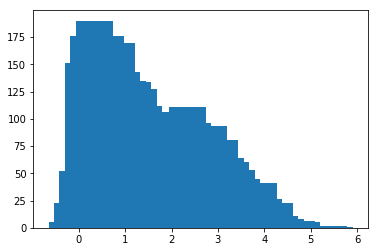

In [25]:
plt.bar((EA_hist[1][1:]+EA_hist[1][:-1])/2, EA_hist[0])

## monthly

In [28]:
monthly_EA = [l[1] for l in list(ds_eto32_EA.groupby('time.month'))]

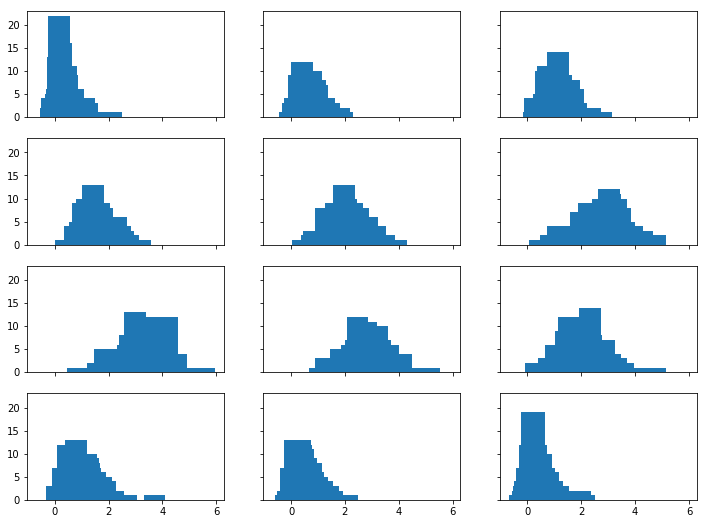

In [36]:
f,axes = plt.subplots(4,3,figsize=(12,9), sharex=True, sharey=True)
faxes = axes.flatten()
for i, ds in enumerate(monthly_EA):
    month_i_hist = np.histogram(ds.values, bins=100)
    faxes[i].bar((month_i_hist[1][1:]+month_i_hist[1][:-1])/2, month_i_hist[0])

From the figure above:
- what are t